In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

# LOAD DATASET

In [2]:
df_2021VAERSVAX = pd.read_csv('C:\\Users\\User\\Downloads\\archive\\archive\\2021VAERSVAX.csv')
#This table provide the remaining vaccine information for each of the vaccines listed, which could be multiple

df_2021VAERSSYMPTOMS = pd.read_csv('C:\\Users\\User\\Downloads\\archive\\archive\\2021VAERSSYMPTOMS.csv')
#Provides the adverse event coded terms 

df_2021VAERSDATA = pd.read_csv('C:\\Users\\User\\Downloads\\archive\\archive\\2021VAERSDATA.csv', encoding='ISO-8859-1')


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_2021VAERSDATA.head(1)

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX RPT_DATE  \
0    916600  01/01/2021    TX     33.0     33.0      NaN   F      NaN   

                                        SYMPTOM_TEXT DIED DATEDIED L_THREAT  \
0  Right side of epiglottis swelled up and hinder...  NaN      NaN      NaN   

  ER_VISIT HOSPITAL  HOSPDAYS X_STAY DISABLE RECOVD    VAX_DATE  ONSET_DATE  \
0      NaN      NaN       NaN    NaN     NaN      Y  12/28/2020  12/30/2020   

   NUMDAYS LAB_DATA V_ADMINBY V_FUNDBY OTHER_MEDS CUR_ILL HISTORY PRIOR_VAX  \
0      2.0     None       PVT      NaN       None    None    None       NaN   

  SPLTTYPE  FORM_VERS TODAYS_DATE BIRTH_DEFECT OFC_VISIT ER_ED_VISIT  \
0      NaN          2  01/01/2021          NaN         Y         NaN   

           ALLERGIES  
0  Pcn and bee venom

# CLEAN DATASET BY REMOVING NON-ESSENTIAL COLUMN AND FILL THE NAN VALUE WITH SOME NECESSARY KEYWORD RELEVANT TO OUR DESIRE 

In [4]:
df_2021VAERSSYMPTOMS_clean = df_2021VAERSSYMPTOMS.drop(columns=["SYMPTOMVERSION1","SYMPTOMVERSION2", "SYMPTOMVERSION3", "SYMPTOMVERSION4", "SYMPTOMVERSION5"]).set_index("VAERS_ID").unstack().dropna().reset_index(name='SYMPTOMS')[["VAERS_ID", "SYMPTOMS"]].groupby("VAERS_ID").agg(lambda x: list(x))

df_2021VAERSDATA_clean = df_2021VAERSDATA.drop(columns=["CAGE_YR", "CAGE_MO", "ER_VISIT", "RPT_DATE", "NUMDAYS", "V_FUNDBY", "FORM_VERS","SYMPTOM_TEXT","DATEDIED","LAB_DATA",'SPLTTYPE','BIRTH_DEFECT','TODAYS_DATE','X_STAY']).fillna(value={'DIED': 'N', "RECOVD": 'U','DISABLE':'N',"OTHER_MEDS":'N',"L_THREAT":'N','HOSPITAL':0,"PRIOR_VAX":'N','ER_ED_VISIT':'N','OFC_VISIT':"N",'HOSPDAYS':0}).astype({'SEX': 'category', "RECOVD": 'category', "V_ADMINBY": 'category'})

df_2021VAERSVAX_clean = df_2021VAERSVAX[df_2021VAERSVAX["VAX_TYPE"]=="COVID19"].drop(columns=['VAX_LOT'])

# MERGE ALL THE DATA FRAMES IRRESPECTIVE OF VAERS ID

In [5]:
df_cleaned = (
    df_2021VAERSDATA_clean.merge(df_2021VAERSVAX_clean, how="inner", left_on="VAERS_ID", right_on="VAERS_ID")
    .merge(df_2021VAERSSYMPTOMS_clean, how="left", left_on="VAERS_ID", right_on="VAERS_ID")
             )

In [6]:
df_cleaned.head()

VAERS_ID    RECVDATE STATE  AGE_YRS SEX DIED L_THREAT HOSPITAL  HOSPDAYS  \
0    916600  01/01/2021    TX     33.0   F    N        N        0       0.0   
1    916601  01/01/2021    CA     73.0   F    N        N        0       0.0   
2    916602  01/01/2021    WA     23.0   F    N        N        0       0.0   
3    916603  01/01/2021    WA     58.0   F    N        N        0       0.0   
4    916604  01/01/2021    TX     47.0   F    N        N        0       0.0   

  DISABLE RECOVD    VAX_DATE  ONSET_DATE V_ADMINBY  \
0       N      Y  12/28/2020  12/30/2020       PVT   
1       N      Y  12/31/2020  12/31/2020       SEN   
2       N      U  12/31/2020  12/31/2020       SEN   
3       N      Y  12/23/2020  12/23/2020       WRK   
4       N      N  12/22/2020  12/29/2020       PUB   

                                          OTHER_MEDS  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
2                                               None   
3                                               none   
4                                                 Na   

                                             CUR_ILL  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
2                                               None   
3                                   kidney infection   
4                                                 Na   

                                             HISTORY  \
0                                               None   
1  Patient residing at nursing facility. See pati...   
2                                               None   
3  diverticulitis, mitral valve prolapse, osteoar...   
4                                                NaN   

                                           PRIOR_VAX OFC_VISIT ER_ED_VISIT  \
0                                                  N         Y           N   
1                                                  N         Y           N   
2                                                  N         N           Y   
3  got measles from measel shot, mums from mumps ...         N           N   
4                                                  N         N           N   

                                           ALLERGIES VAX_TYPE  \
0                                  Pcn and bee venom  COVID19   
1                                            "Dairy"  COVID19   
2                                          Shellfish  COVID19   
3  Diclofenac, novacaine, lidocaine, pickles, tom...  COVID19   
4                                                 Na  COVID19   

          VAX_MANU VAX_DOSE_SERIES VAX_ROUTE VAX_SITE  \
0          MODERNA               1        IM       LA   
1          MODERNA               1        IM       RA   
2  PFIZER\BIONTECH               1        IM       LA   
3          MODERNA             UNK       NaN      NaN   
4          MODERNA               1        IM       LA   

                              VAX_NAME  \
0          COVID19 (COVID19 (MODERNA))   
1          COVID19 (COVID19 (MODERNA))   
2  COVID19 (COVID19 (PFIZER-BIONTECH))   
3          COVID19 (COVID19 (MODERNA))   
4          COVID19 (COVID19 (MODERNA))   

                                            SYMPTOMS  
0                          [Dysphagia, Epiglottitis]  
1                                [Anxiety, Dyspnoea]  
2  [Chest discomfort, Dysphagia, Pain in extremit...  
3           [Dizziness, Fatigue, Mobility decreased]  
4  [Injection site erythema, Injection site pruri...

# CLEAN THE DUPLICATE AND MULTIPLE VALUE OF SAME VAERS ID

In [7]:
index =df_cleaned['VAERS_ID']
is_duplicate = index.duplicated(keep="first")
not_duplicate = ~is_duplicate
df_cleaned = df_cleaned[not_duplicate]

# EXTRACTING SYMPTOMS FROM THE SYMPTOMS LIST AND COUNT THE FREQUENCY OF ITS TYPE 

In [8]:
SYMP_LIST = df_cleaned["SYMPTOMS"].explode().unique()
a = pd.Series([item for sublist in df_cleaned.SYMPTOMS for item in sublist])
new_df_for_symp_count = a.value_counts().sort_index().rename_axis('SYMPTOM').reset_index(name='frequency')
#df.sort_values("frequency", ascending=False)
new_df_for_symp_count = new_df_for_symp_count.sort_values(by=['frequency'],ascending=False)
new_df_for_symp_count.nlargest(4000, ['frequency'])

SYMPTOM  frequency
1776                                           Headache       7240
3159                                            Pyrexia       5827
934                                              Chills       5518
1513                                            Fatigue       5237
2804                                               Pain       4802
2615                                             Nausea       4156
1247                                          Dizziness       3470
2806                                  Pain in extremity       3092
2561                                            Myalgia       2879
2094                                Injection site pain       2775
2068                            Injection site erythema       2224
291                                          Arthralgia       2098
1285                                           Dyspnoea       2086
3108                                           Pruritus       1750
4058                                           Vomiting       1748
2107                            Injection site swelling       1673
3173                                               Rash       1612
1150                                              Death       1612
312                                            Asthenia       1531
2099                            Injection site pruritus       1394
3336                           SARS-CoV-2 test positive       1332
1425                                           Erythema       1281
2385                                            Malaise       1280
2834                                       Paraesthesia       1251
1217                                          Diarrhoea       1231
2111                              Injection site warmth       1174
3885                                          Urticaria       1167
750                                            COVID-19       1078
1930                                      Hypoaesthesia       1055
2342                                    Lymphadenopathy       1010
1084                                              Cough        984
1898                                      Hyperhidrosis        940
1523                                   Feeling abnormal        921
3335                           SARS-CoV-2 test negative        885
1782                               Heart rate increased        835
925                                    Chest discomfort        813
3333                                    SARS-CoV-2 test        813
928                                          Chest pain        761
2817                                       Palpitations        721
1550                                           Flushing        711
2912                                Peripheral swelling        709
3751                                             Tremor        689
1526                                        Feeling hot        635
3933                              Vaccination site pain        614
3610                                        Tachycardia        609
1038                               Condition aggravated        602
2101                                Injection site rash        592
359                                           Back pain        592
2619                                          Neck pain        561
3593                                           Swelling        561
2761                                 Oropharyngeal pain        558
1155                                 Decreased appetite        554
665                          Body temperature increased        541
630                                          Blood test        535
2836                                  Paraesthesia oral        534
612                            Blood pressure increased        515
1322                                  Electrocardiogram        512
3598                                            Syncope        500
3456                                          Skin warm        494
3652                        

# REPLACE ALL KINDS OF  PAIN(such as back pain, neck pain) TO PAIN

In [9]:
Pain_List = ['Back pain',
             'Neck pain',
             'Oropharyngeal pain',
             'Ear pain',
             'Eye pain',
             'Abdominal pain',
             'Axillary pain',
             'Lymph node pain',
             'Pain in jaw',
             'Bone pain',
             'Pain of skin',
             'Facial pain',
             'Breast pain',
             'Flank pain',
             'Musculoskeletal chest pain',
             'Vaccination site pain']

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'Pain'
        return s
    return r
for item in Pain_List:
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)



# REPLACE ALL KIND OF COMPUTERISED TOMOGRAM TEST TO COMPUTERISED TOMOGRAM TEST

In [10]:
Tomogram_List = ['Computerised tomogram coronary artery normal',
                 'Computerised tomogram coronary artery',
                 'Computerised tomogram aorta','Computerised tomogram pancreas normal',
                 'Computerised tomogram intestine',
'Computerised tomogram abdomen normal',
'Computerised tomogram pelvis',
'Computerised tomogram pelvis abnormal',
'Computerised tomogram spine',
'Computerised tomogram neck',
'Computerised tomogram thorax normal',
'Computerised tomogram abdomen abnormal',
'Computerised tomogram thorax abnormal',
'Computerised tomogram head abnormal',
'Computerised tomogram abdomen',
'Computerised tomogram thorax',
'Computerised tomogram abnormal',
'Computerised tomogram normal',
'Computerised tomogram head normal',
'Computerised tomogram head',
'Computerised tomogram' 
                
                ]

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'Tomogram Test'
        return s
    return r
for item in Tomogram_List:
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)

# REPLACE ALL KIND OF MRI TEST TO MRI TEST

In [11]:
MRI_List = [
'Magnetic resonance imaging',
'Magnetic resonance imaging brain',
'Magnetic resonance imaging brain abnormal',
'Magnetic resonance imaging normal',
'Magnetic resonance imaging brain normal',
'Magnetic resonance imaging abnormal',
'Magnetic resonance imaging head',
'Magnetic resonance imaging neck',
'Magnetic resonance imaging spinal abnormal',
'Magnetic resonance imaging spinal',
'Magnetic resonance imaging heart',
'Magnetic resonance imaging head abnormal',
'Magnetic resonance imaging head normal',
'Magnetic resonance imaging thoracic abnormal',               
                ]

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'MRI Test'
        return s
    return r
for item in MRI_List:
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)

# REPLACE ALL KIND OF X RAY TEST TO XRAY TEST

In [12]:
Xray_List = [
    'X-ray',
'X-ray normal',
'X-ray limb',
'X-ray abnormal',
'X-ray limb normal',
'Spinal X-ray',
'X-ray of pelvis and hip',
'Abdominal X-ray ',
'X-ray of pelvis and hip abnormal ',
'X-ray limb abnormal',
'X-ray with contrast', 
'Spinal X-ray normal ',
'Urinary system x-ray abnormal',
'Urinary system X-ray',
'Spinal X-ray abnormal',
'X-ray of pelvis and hip normal',
'X-ray with contrast lower gastrointestinal tract',
'X-ray with contrast upper gastrointestinal tra...'
                
                ]

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'Xray Test'
        return s
    return r
for item in Xray_List:
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)

# REPLACE ALL KINDS OF CHEST RELATED AILMENTS TO CHEST PROBLEM

In [13]:
Chest_List = ['Chest pain','Chest X-ray','Chest X-ray abnormal','Chest discomfort']

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'Chest Problem'
        return s
    return r
for item in Chest_List:
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)


# REPLACE ALL KINDS OF PNEUMONIA TO PNEUMONIA

In [14]:
PNEUMONIA_List = ['COVID-19 pneumonia']

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'PNEUMONIA'
        return s
    return r
for item in PNEUMONIA_List:
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)

# REPLACE ALL KINDS OF HEADACHE(such as Tension headache','Sinus headache','Cluster headache','Thunderclap headache') TO HEADACHE

In [15]:
Headache_List = ['Tension headache','Sinus headache','Cluster headache','Thunderclap headache','Exertional headache','Primary headache associated with sexual activity']

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'Headache'
        return s
    return r
for item in Headache_List:
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)

# REPLACE ALL KINDS OF  INJECTION SITE AILMENTS(such as injection site pain,injection site swelling ) TO INJECTION SITE REACTION¶

In [16]:
Injection_site_List = ['Injection site pain',
'Injection site erythema',
'Injection site swelling',
'Injection site pruritus',
'Injection site swelling',
'Injection site pruritus',
'Injection site warmth',
'Injection site rash',
'Injection site induration',
'Injection site reaction',
'Injection site urticaria',
'Injection site mass',
'Injection site bruising',
'Injection site nodule',
'Injection site cellulitis',
'Injection site discomfort',
'Injection site inflammation',
'Injection site hypoaesthesia',
'Injection site discolouration',
'Injection site paraesthesia',
'Injection site oedema',
'Injection site vesicles',
'Injection site irritation',
'Injection site haemorrhage',
'Injection site streaking',
'Injection site lymphadenopathy',
'Injection site joint pain',
'Injection site hypersensitivity',
'Injection site extravasation',
'Injection site muscle weakness',
'Injection site movement impairment',
'Injection site infection',
'Injection site scab',
'Injection site abscess',
    
]

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'Injection Site Reaction'
        return s
    return r
for item in Injection_site_List:
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)


# REPLACE ALL KINDS  OF Dyspnoea to Dyspnoea

In [17]:
Dyspnoea_List = [
                'Dyspnoea exertional',
                'Dyspnoea at rest',
                'Dyspnoea paroxysmal nocturnal'
                ]

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'Dyspnoea'
        return s
    return r
for item in Dyspnoea_List:
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)



# HANDLE THE COVID POSITIVE 

In [18]:
Covid_Positive_List = [
                'SARS-CoV-2 test',
                'SARS-CoV-2 test positive','COVID-19','Exposure to SARS-CoV-2'
                   
    
    
                ]

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'COVID-19 POSITIVE'
        return s
    return r
for item in Covid_Positive_List :
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)

# REPLACE ALL KINDS OF ASTHENIA TO ASTHENIA

In [19]:
Asthenia_List = [
                'Myasthenia gravis',
                 'Myasthenia gravis crisis',
                ]

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'Asthenia'
        return s
    return r
for item in Asthenia_List:
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)

# REPLACE ALL KINDS OF DEATH VALUE TO DEATH

In [20]:
Death_List = [
                'Sudden death'          
]

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'Death'
        return s
    return r
for item in Death_List:
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)


# REPLACE ALL KINDS OF  DIARRHOEA TO DIARRHOEA

In [21]:
Diarrhoea_List = [
                'Diarrhoea haemorrhagic'          
]

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'Diarrhoea'
        return s
    return r
for item in Diarrhoea_List:
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)


# REPLACE ALL KINDS OF HYPOAESTHESIA TO HYPOAESTHESIA

In [22]:
Hypoaesthesia_List = [
                'Hypoaesthesia oral',
    'Pharyngeal hypoaesthesia',
    'Hypoaesthesia eye',
    'Vaccination site hypoaesthesia',
    'Intranasal hypoaesthesia',
    'Genital hypoaesthesia',
    'Hypoaesthesia teeth'
]

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'Hypoaesthesia'
        return s
    return r
for item in Hypoaesthesia_List:
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)

# REPLACE ALL KINDS OF RASH TO RASH

In [23]:
Rash_List = [
                'Rash erythematous',
    'Rash pruritic',
    'Rash macular',
    'Rash papular',
    'Rash vesicular',
    'Vaccination site rash',
    'Rash maculo-papular',
    'Rash pustular'
    
]

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'Rash'
        return s
    return r
for item in Rash_List:
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)



# REPLACE ALL KINDS OF COUGH TO COUGH

In [24]:
Cough_List = [
                'Productive cough',
    'Upper-airway cough syndrome',
    'Cough variant asthma',
    
]

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'Cough'
        return s
    return r
for item in Cough_List:
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)



# REPLACE ALL KINDS OF SWELLING TO SWELLING

In [25]:
Swelling_List = [
               'Bone swelling',
'Auricular swelling',
'Peripheral swelling',
'Swelling face',
'Lip swelling',
'Pharyngeal swelling',
'Vaccination site swelling',
'Eye swelling',
'Joint swelling',
'Periorbital swelling',
'Swelling of eyelid',
'Mouth swelling',
'Skin swelling',
'Ear swelling',
'Gingival swelling',
'Muscle swelling',
'Palatal swelling',
'Circumoral swelling',
'Soft tissue swelling',

    
]

def f(replaced_value, col1):
    def r(s):
        while replaced_value in s[col1]:
            s[col1][s[col1].index(replaced_value)] = 'Swelling'
        return s
    return r
for item in Swelling_List:
    df_cleaned= df_cleaned.apply(f(item,"SYMPTOMS"), axis=1)



# NEW FREQUENCY TABLE OF SYMPTOMS

In [26]:
SYMP_LIST = df_cleaned["SYMPTOMS"].explode().unique()
a = pd.Series([item for sublist in df_cleaned.SYMPTOMS for item in sublist])
new_df_for_symp_count = a.value_counts().sort_index().rename_axis('SYMPTOM').reset_index(name='frequency')
#df.sort_values("frequency", ascending=False)
new_df_for_symp_count = new_df_for_symp_count.sort_values(by=['frequency'],ascending=False)
new_df_for_symp_count = new_df_for_symp_count.nlargest(51, ['frequency'])
new_df_for_symp_count

SYMPTOM  frequency
2006     Injection Site Reaction      11574
2698                        Pain       8869
1727                    Headache       7281
3044                     Pyrexia       5827
923                       Chills       5518
1467                     Fatigue       5237
2510                      Nausea       4156
1211                   Dizziness       3470
743            COVID-19 POSITIVE       3331
2700           Pain in extremity       3092
3463                    Swelling       2909
3058                        Rash       2886
2458                     Myalgia       2879
1249                    Dyspnoea       2160
290                   Arthralgia       2098
914                Chest Problem       2084
2993                    Pruritus       1750
3918                    Vomiting       1748
1115                       Death       1655
311                     Asthenia       1543
1881               Hypoaesthesia       1455
3555               Tomogram Test       1419
1384                    Erythema       1281
2285                     Malaise       1280
1182                   Diarrhoea       1253
2725                Paraesthesia       1251
3749                   Urticaria       1167
1050                       Cough       1080
2255             Lymphadenopathy       1010
1849               Hyperhidrosis        940
1477            Feeling abnormal        921
3212    SARS-CoV-2 test negative        885
1733        Heart rate increased        835
2273                    MRI Test        755
2708                Palpitations        721
1503                    Flushing        711
3618                      Tremor        689
1480                 Feeling hot        635
3478                 Tachycardia        609
1004        Condition aggravated        602
1120          Decreased appetite        554
661   Body temperature increased        541
626                   Blood test        535
2727           Paraesthesia oral        534
608     Blood pressure increased        515
1281           Electrocardiogram        512
3466                     Syncope        500
3330                   Skin warm        494
3519            Throat tightness        487
1862                Hypertension        425
2224       Loss of consciousness        423

# LIST THE TOP  AILMENTS (RESULT OF C-19 VACCINE REACTION)

In [27]:
Reaction_List = ['C-REACTIVE PROTEIN INCREASED',
 'OXYGEN SATURATION DECREASED',
 'PNEUMONIA',
 'ELECTROCARDIOGRAM ABNORMAL',
 'APHASIA',
 'ECHOCARDIOGRAM',
 'INTENSIVE CARE',
 'HYPOTENSION',
 'RESPIRATORY TRACT CONGESTION',
 'UNRESPONSIVE TO STIMULI',
 'DIZZINESS',
 'RESUSCITATION',
 'PYREXIA',
 'TOMOGRAM TEST',
 'WHITE BLOOD CELL COUNT NORMAL',
 'PAIN',
 'ANGIOGRAM',
 'LABORATORY TEST',
 'MYOCARDIAL INFARCTION',
 'URINE ANALYSIS',
 'HYPOXIA',
 'COUGH',
 'FULL BLOOD COUNT',
 'DEEP VEIN THROMBOSIS',
 'MENTAL STATUS CHANGES',
 'SEPSIS',
 'RASH',
 'PLATELET COUNT DECREASED',
 'ATRIAL FIBRILLATION',
 'CONDITION AGGRAVATED',
 'FALL',
 'CARDIAC ARREST',
 'PRURITUS',
 'ANOSMIA',
 'SARS-COV-2 TEST NEGATIVE',
 'CEREBROVASCULAR ACCIDENT',
 'SWELLING',
 'METABOLIC FUNCTION TEST',
 'CHEST PROBLEM',
 'FATIGUE',
 'HEMIPARESIS',
 'PAIN IN EXTREMITY',
 'TROPONIN INCREASED',
 'ASTHENIA',
 'CHEST X-RAY NORMAL',
 'HAEMOGLOBIN DECREASED',
 'ARTHRALGIA',
 'HEADACHE',
 'ELECTROCARDIOGRAM',
 'AGEUSIA',
 'ECHOCARDIOGRAM NORMAL',
 'TROPONIN',
 'PARAESTHESIA',
 'NAUSEA',
 'URINARY TRACT INFECTION',
 'PULSE ABSENT',
 'BLOOD CREATININE INCREASED',
 'CHILLS',
 'DYSARTHRIA',
 'SEIZURE',
 'MYALGIA',
 'MRI TEST',
 'BLOOD UREA INCREASED',
 'INJECTION SITE REACTION',
 'DRUG INEFFECTIVE',
 'BLOOD TEST',
 'PULMONARY EMBOLISM',
 'ENDOTRACHEAL INTUBATION',
 'FIBRIN D DIMER INCREASED',
 'DYSPNOEA',
 'CONFUSIONAL STATE',
 'THROMBOSIS',
 'WHITE BLOOD CELL COUNT INCREASED',
 'COVID-19 POSITIVE']

# CONVERT ALL THE CHARACTER TO UPPER CASE OF SYMPTOMS COLUMN

In [28]:
df_cleaned["SYMPTOMS"] = df_cleaned["SYMPTOMS"].astype(str)
df_cleaned["SYMPTOMS"]  = df_cleaned["SYMPTOMS"].str.upper()

# CREATION OF COLUMN OF THE REACTIONS OF C-19 VACCINE IN THE DATA SET

In [29]:
for item in Reaction_List:
    df_cleaned[item] = (df_cleaned.apply(lambda x: x.astype(str).str.contains(item)).any(axis=1).astype(int))

# HANDLE THE DIED AND DEATH COLUMN

In [30]:
df_cleaned["DIED"].replace({"Y": 1, "N": 0}, inplace=True)

In [31]:
df_cleaned["DIED"].value_counts()

0    31893
1     1904
Name: DIED, dtype: int64

In [32]:
df_cleaned["HOSPITAL"].value_counts()

0    29503
Y     4294
Name: HOSPITAL, dtype: int64

# HANDLE THE DISABLE FIELD

In [33]:
df_cleaned["DISABLE"].replace({"Y": 1, "N": 0}, inplace=True)

# HANDLE THE ALLERGIES DATA FIELD

In [34]:
A_Handle_List = ['N','nan','UNKNO','-','NO KNOWN','NONE REPORTED','NOT KNOWN',
               'NaN','NaNlisted','Not reported','Not known','Unknown.','NO KNOWN DRUG ALLERGIES','NONE KNOWN','NONE LISTED',
'No known allergies','none that I am aware of ','not avl to this reporter','Not that I know of.','none that I know of  ',
'Unknown','No known food or drug allergies','No known medication allergies'
'unknown',
'NaNknown',
'Pharyngeal swelling',
'No Known Allergies',
'UNKNOWN',
'No known allergies.',
'NaNKnown',
'none reported',
'No allergies',
'No known drug allergies',
'KNA',
'UNK',
'NO KNOWN ALLERGIES',
'No Known Drug Allergies',
'NaN drug allergies',
'none listed',
'NaNknown.','No Known allergies',
'no allergies',
'not known ','NaNnoted','No know allergies'
]
A_Handle_List = [x.upper() for x in A_Handle_List]

In [35]:
df_cleaned["ALLERGIES"]= df_cleaned["ALLERGIES"].astype(str)
ALLERGIES_LIST = df_cleaned["ALLERGIES"].explode().unique()

new_col = []
for s in df_cleaned["ALLERGIES"]:
    list_in =[]
    for index, w in enumerate(A_Handle_List):
        if w in s.upper():
            a = 'N'
            break
        else:
            a = s
    new_col.append(a)    
df_cleaned["ALLERGIES"] = new_col

In [36]:
ALLERGIES_LIST = df_cleaned["ALLERGIES"].explode().unique()
ALLERGIES_LIST =[x if x!= 'N' else '1' for x in ALLERGIES_LIST ]
df_cleaned["ALLERGIES"]  = df_cleaned["ALLERGIES"] .replace(["N"], 0)
df_cleaned["ALLERGIES"]  = df_cleaned["ALLERGIES"] .replace(ALLERGIES_LIST, 1)


# HANDLED AGE

In [37]:
df_cleaned['AGE_YRS'] = df_cleaned['AGE_YRS'].fillna((df_cleaned['AGE_YRS'].mean()))

# HANDLE PRIOR VAXINE LIST

In [38]:
Vax_List= [ x for x in df_cleaned["PRIOR_VAX"].explode().unique() if x!= 'N' or x!='unknown']

In [39]:
df_cleaned["PRIOR_VAX"] = df_cleaned["PRIOR_VAX"].replace(["N",'unknown'], 0)
df_cleaned["PRIOR_VAX"] = df_cleaned["PRIOR_VAX"].replace(Vax_List, 1)



# HANDLE LIFE THREATING EVENT

In [40]:
df_cleaned["L_THREAT"] = df_cleaned["L_THREAT"].replace(["N"], 0)
df_cleaned["L_THREAT"] = df_cleaned["L_THREAT"].replace(["Y"], 1)


# HANDLE ILLNESS OF VACCINATION TIME (CURR_ILL)

In [41]:
df_cleaned["CUR_ILL"] = df_cleaned["CUR_ILL"].str.upper()
CURR_ILL_list = df_cleaned["CUR_ILL"].explode().unique()
CURR_NOT_ILL_list = df_cleaned["CUR_ILL"][df_cleaned["CUR_ILL"].str.match(r'^[nN].*')==True]
CURR_VALID_ILL_list = list(set(CURR_ILL_list)-set(CURR_NOT_ILL_list))
CURR_VALID_ILL_list= [x for x in CURR_VALID_ILL_list  if str(x) != 'nan']
df_cleaned["CUR_ILL"] = df_cleaned["CUR_ILL"].replace(CURR_VALID_ILL_list, 1)
df_cleaned["CUR_ILL"] = df_cleaned["CUR_ILL"].fillna(0)
df_cleaned["CUR_ILL"] = df_cleaned["CUR_ILL"].replace([r'^[nN].*'], 0,regex=True)
df_cleaned["CUR_ILL"] = df_cleaned["CUR_ILL"].astype(int)

# HANDLE TAKING OTHER MADICINE WHILE IMPOSING VACCINE

In [42]:
df_cleaned["OTHER_MEDS"] = df_cleaned["OTHER_MEDS"].str.upper()
OTHER_MEDS_list = df_cleaned["OTHER_MEDS"].explode().unique()
NOT_OTHER_MEDS_list = df_cleaned["OTHER_MEDS"][df_cleaned["OTHER_MEDS"].str.match(r'^[nN].*')==True]
VALID_OTHER_MEDS_list = list(set(OTHER_MEDS_list)-set(NOT_OTHER_MEDS_list))
VALID_OTHER_MEDS_list= [x for x in VALID_OTHER_MEDS_list  if str(x) != 'nan']
df_cleaned["OTHER_MEDS"] = df_cleaned["OTHER_MEDS"].replace(VALID_OTHER_MEDS_list, 1)
df_cleaned["OTHER_MEDS"] = df_cleaned["OTHER_MEDS"].fillna(0)
df_cleaned["OTHER_MEDS"] = df_cleaned["OTHER_MEDS"].replace([r'^[nN].*'], 0,regex=True)
df_cleaned["OTHER_MEDS"]=df_cleaned["OTHER_MEDS"].astype(int)

# HANDLE THE PATIENT'S HISTORY RECORD

In [43]:
#MOST COMMON FACTORS WHICH ARE RESPONSIBLE FOR BRINGING VACCINE REACTION 
#SUGGESTED BY DR
HISTORY_LIST = ['Type-2 Diabetes',
                'Hypertension',
                'Arthritis',
                'Asthma',
                'Migraine',
                'High cholesterol',
                'Abnormal Blood Pressure',
                'Chronic Obstructive Pulmonary Disease',
                'GERD',
                'Anxiety',
                'Obesity',
                'depression',
                'Thyroid Disorder',
                'Anemia',
                'Dementia',
                'Cancer',
                'Kidney Disease',
                'Hyperlipidemia',
                'Heart Disease',
                'Covid-19 Positive History',
                'Atrial Fibrillation',
                'Pain Symptoms']
HISTORY_LIST = [x.upper() for x in HISTORY_LIST]

In [44]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].astype(str)



In [45]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].str.replace(",", "") 


In [46]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].str.replace("[^a-zA-Z0-9]", " ") 


In [47]:
import nltk

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [49]:
stopwords=nltk.corpus.stopwords.words('english')

In [50]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [51]:
!pip install emot

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [52]:
!pip install pyspellchecker

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [53]:
# Import Section
import csv, codecs, sys, io, re, random, string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(preserve_case=True, strip_handles=True, reduce_len=True)
from emot.emo_unicode import EMOTICONS
from spellchecker import SpellChecker
from nltk.tokenize import word_tokenize
stoplist = set(stopwords.words("english"))
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stoplist])
    return clean_text
def nomalize_text(text):
    text = text.lower()
    # Remove urls
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from 
    text = re.sub(r'[0-9]+|\#','',text)
    # Remove punctuations
    text = text.translate(str.maketrans('','', string.punctuation))

    return text

def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', " ".join(EMOTICONS[emot].replace(",","").split()), text)
    return text


spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [54]:
df_cleaned2 = df_cleaned.copy() 

In [55]:
df_cleaned.shape

(33797, 102)

In [56]:
df_cleaned["HISTORY"]

0                                                     None
1        Patient residing at nursing facility  See pati...
2                                                     None
3        diverticulitis mitral valve prolapse osteoarth...
4                                                      nan
5                                                      nan
6        High blood pressure high cholesterol sleep apn...
7                                                     None
8          Hashimoto s thyroiditis Hypertension depression
9                                                      nan
10                                         Obesity Anxiety
11                                                    None
12                                                    None
13                                         Migraines  PMDD
14                                              Depression
15                                                     nan
16                                                     n

In [57]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].apply(remove_stopwords)



In [58]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].apply(convert_emoticons)



In [59]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].apply(nomalize_text)



In [60]:
##
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].apply(correct_spellings)

In [61]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].apply(lambda x: x.split())

In [62]:
df_cleaned["HISTORY"]

0                                                   [none]
1        [patient, residing, nursing, facility, see, pa...
2                                                   [none]
3        [diverticulitis, mitral, valve, prolapse, oste...
4                                                    [nan]
5                                                    [nan]
6        [high, blood, pressure, high, cholesterol, sle...
7                                                   [none]
8        [hashimoto, thyroiditis, hypertension, depress...
9                                                    [nan]
10                                      [obesity, anxiety]
11                                                  [none]
12                                                  [none]
13                                       [migraines, padd]
14                                            [depression]
15                                                   [nan]
16                                                   [na

In [63]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [64]:
df_cleaned["HISTORY"]= df_cleaned["HISTORY"].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

In [65]:
df_cleaned["HISTORY"]= df_cleaned["HISTORY"].apply(lambda x: ' '.join([w for w in x]))

In [66]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].str.upper()

In [67]:

df_cleaned["HISTORY"]

0                                                     NONE
1        PATIENT RESIDING NURSING FACILITY SEE PATIENT ...
2                                                     NONE
3        DIVERTICULITIS MITRAL VALVE PROLAPSE OSTEOARTH...
4                                                      NAN
5                                                      NAN
6        HIGH BLOOD PRESSURE HIGH CHOLESTEROL SLEEP APN...
7                                                     NONE
8            HASHIMOTO THYROIDITIS HYPERTENSION DEPRESSION
9                                                      NAN
10                                         OBESITY ANXIETY
11                                                    NONE
12                                                    NONE
13                                           MIGRAINE PADD
14                                              DEPRESSION
15                                                     NAN
16                                                     N

In [68]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].replace(r'DIABETES', ' TYPE-2 DIABETES ', regex=True) 


In [69]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].replace(r'HYPERT', ' HYPERTENSION ', regex=True)


In [70]:

df_cleaned["HISTORY"] = df_cleaned["HISTORY"].replace(r'ARTH', ' ARTHRITIS ', regex=True)


In [71]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].replace(r'PAIN', ' PAIN SYMPTOMS ', regex=True)


In [72]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].replace(r'POSIT', ' COVID-19 POSITIVE HISTORY ', regex=True)


In [73]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].replace(r'HEART DIS', ' Heart Disease ', regex=True)


In [74]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].replace(r'HYPERL', ' HYPERLIPIDEMIA ', regex=True)


In [75]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].replace(r'KID', ' KIDNEY DISEASE ', regex=True)


In [76]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].replace(r'DEMEN', ' DEMENTIA ', regex=True)


In [77]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].replace(r'PULMON', ' CHRONIC OBSTRUCTIVE PULMONARY DISEASE ', regex=True)


In [78]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].replace(r'BLOOD', ' ABNORMAL BLOOD PRESSURE ', regex=True)


In [79]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].replace(r'CHOLESTEROL', ' HIGH CHOLESTEROL ', regex=True)


In [80]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].replace(r'ANXI', ' ANXIETY ', regex=True)


In [81]:
df_cleaned["HISTORY"] = df_cleaned["HISTORY"].replace(r'THYROID', ' THYROID DISORDER ', regex=True)

In [82]:
new_col = []
for s in df_cleaned["HISTORY"]:
    list_in =[]
    for index, w in enumerate(HISTORY_LIST):
        if w in s.upper():
            list_in.append(w)
    if len(list_in)==0:
        list_in.append('nan')
    new_col.append(list_in)    
df_cleaned["HISTORYLIST"] = new_col

In [83]:
#list of most important history factor of reaction with its frequency
aa = pd.Series([item for sublist in df_cleaned.HISTORYLIST for item in sublist])
dff = aa.value_counts().sort_index().rename_axis('HISTORY').reset_index(name='frequency')
#df.sort_values("frequency", ascending=False)
dff = dff.sort_values(by=['frequency'],ascending=False)
dff
#SYM  = df_cleaned.SYMPTOMS.value_counts()

HISTORY  frequency
22                                    nan      23858
15                           HYPERTENSION       2085
4                                  ASTHMA       1944
20                       THYROID DISORDER       1746
21                        TYPE-2 DIABETES       1570
0                 ABNORMAL BLOOD PRESSURE       1157
3                               ARTHRITIS       1042
10                             DEPRESSION        979
2                                 ANXIETY        943
14                         HYPERLIPIDEMIA        793
17                               MIGRAINE        765
13                       HIGH CHOLESTEROL        716
6                                  CANCER        568
18                                OBESITY        525
19                          PAIN SYMPTOMS        513
16                         KIDNEY DISEASE        416
1                                  ANEMIA        350
9                                DEMENTIA        317
5                     ATRIAL FIBRILLATION        288
12                          HEART DISEASE        235
7   CHRONIC OBSTRUCTIVE PULMONARY DISEASE        157
8               COVID-19 POSITIVE HISTORY         94
11                                   GERD          6

# CREATE COLUMN FOR PREVIOUS AILMENTS

In [84]:
for item in HISTORY_LIST:
    df_cleaned[item] = (df_cleaned.apply(lambda x: x.astype(str).str.contains(item)).any(axis=1).astype(int))

In [85]:
df_cleaned.head()

VAERS_ID    RECVDATE STATE  AGE_YRS SEX  DIED  L_THREAT HOSPITAL  HOSPDAYS  \
0    916600  01/01/2021    TX     33.0   F     0         0        0       0.0   
1    916601  01/01/2021    CA     73.0   F     0         0        0       0.0   
2    916602  01/01/2021    WA     23.0   F     0         0        0       0.0   
3    916603  01/01/2021    WA     58.0   F     0         0        0       0.0   
4    916604  01/01/2021    TX     47.0   F     0         0        0       0.0   

   DISABLE RECOVD    VAX_DATE  ONSET_DATE V_ADMINBY  OTHER_MEDS  CUR_ILL  \
0        0      Y  12/28/2020  12/30/2020       PVT           0        0   
1        0      Y  12/31/2020  12/31/2020       SEN           1        1   
2        0      U  12/31/2020  12/31/2020       SEN           0        0   
3        0      Y  12/23/2020  12/23/2020       WRK           0        1   
4        0      N  12/22/2020  12/29/2020       PUB           0        0   

                                             HISTORY  PRIOR_VAX OFC_VISIT  \
0                                               NONE          0         Y   
1  PATIENT RESIDING NURSING FACILITY SEE PATIENT ...          0         Y   
2                                               NONE          0         N   
3  DIVERTICULITIS MITRAL VALVE PROLAPSE OSTEO ART...          1         N   
4                                                NAN          0         N   

  ER_ED_VISIT  ALLERGIES VAX_TYPE         VAX_MANU VAX_DOSE_SERIES VAX_ROUTE  \
0           N          0  COVID19          MODERNA               1        IM   
1           N          1  COVID19          MODERNA               1        IM   
2           Y          1  COVID19  PFIZER\BIONTECH               1        IM   
3           N          0  COVID19          MODERNA             UNK       NaN   
4           N          0  COVID19          MODERNA               1        IM   

  VAX_SITE                             VAX_NAME  \
0       LA          COVID19 (COVID19 (MODERNA))   
1       RA          COVID19 (COVID19 (MODERNA))   
2       LA  COVID19 (COVID19 (PFIZER-BIONTECH))   
3      NaN          COVID19 (COVID19 (MODERNA))   
4       LA          COVID19 (COVID19 (MODERNA))   

                                            SYMPTOMS  \
0                      ['DYSPHAGIA', 'EPIGLOTTITIS']   
1                            ['ANXIETY', 'DYSPNOEA']   
2  ['CHEST PROBLEM', 'DYSPHAGIA', 'PAIN IN EXTREM...   
3     ['DIZZINESS', 'FATIGUE', 'MOBILITY DECREASED']   
4  ['INJECTION SITE REACTION', 'INJECTION SITE RE...   

   C-REACTIVE PROTEIN INCREASED  OXYGEN SATURATION DECREASED  PNEUMONIA  \
0                             0                            0          0   
1                             0                            0          0   
2                             0                            0          0   
3                             0                            0          0   
4                             0                            0          0   

   ELECTROCARDIOGRAM ABNORMAL  APHASIA  ECHOCARDIOGRAM  INTENSIVE CARE  \
0                           0        0               0               0   
1                           0        0               0               0   
2                           0        0               0               0   
3                           0        0               0               0   
4                           0        0               0               0   

   HYPOTENSION  RESPIRATORY TRACT CONGESTION  UNRESPONSIVE TO STIMULI  \
0            0                             0                        0   
1            0                             0                        0   
2            0                             0                        0   
3            0                             0                        0   
4            0                             0                        0   

   DIZZINESS  RESUSCITATION  PYREXIA  TOMOGRAM TEST  \
0          0              0        0              0   
1          0              

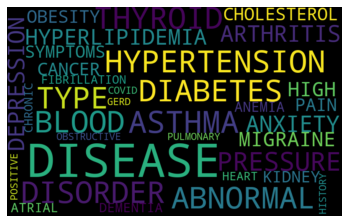

In [86]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in dff["HISTORY"] if text!= 'nan'])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 


# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# HANDLE ER_ED_VISIT

In [87]:
df_cleaned["ER_ED_VISIT"]  = df_cleaned["ER_ED_VISIT"] .replace(["N"], 0)
df_cleaned["ER_ED_VISIT"]  = df_cleaned["ER_ED_VISIT"] .replace(['Y'], 1)

# HANDLE OFC VISIT

In [88]:
df_cleaned["OFC_VISIT"]  = df_cleaned["ER_ED_VISIT"] .replace(["N"], 0)
df_cleaned["OFC_VISIT"]  = df_cleaned["ER_ED_VISIT"] .replace(['Y'], 1)

# HANDLE HOSPITALIZED

In [89]:
df_cleaned['HOSPITAL'] = df_cleaned["HOSPITAL"] .replace(['Y'], 1)
df_cleaned['HOSPITAL'] = df_cleaned['HOSPITAL'].astype(int)
df_cleaned['HOSPDAYS'] = df_cleaned['HOSPDAYS'].astype(int)

# HANDLE SEX

In [90]:
df_cleaned = df_cleaned[df_cleaned.SEX!='U'] 
df_cleaned["SEX"] = df_cleaned["SEX"].replace(['F'], 0,regex=True)
df_cleaned["SEX"] = df_cleaned["SEX"].replace(['M'], 1,regex=True)


# HANDLE HOSPITAL DAYS

In [91]:
HOS_handle_list =['HOSPDAYS','HOSPITAL']
index_list =[]
for col in HOS_handle_list:
    index_names = df_cleaned[ df_cleaned[col] != 0].index
    print (" ",col," ",len(index_names))
    index_list.append(index_names)
flat_index_list = [item for sublist in index_list for item in sublist]
flat_index_set = set(flat_index_list)
flat_index_list = list(flat_index_set)


  HOSPDAYS   2815
  HOSPITAL   4245


In [92]:
df_cleaned.loc[flat_index_list,'HOSPITAL'] = 1
    

# HANDLE VAX DOSE SERIES 

In [93]:
df_cleaned = df_cleaned[df_cleaned['VAX_DOSE_SERIES']!='UNK']

In [94]:
df_cleaned = df_cleaned[df_cleaned['VAX_DOSE_SERIES']!='7+']

In [95]:
df_cleaned = df_cleaned[df_cleaned['VAX_DOSE_SERIES']!='NaN']

In [96]:
df_cleaned['VAX_DOSE_SERIES'] = df_cleaned['VAX_DOSE_SERIES'].fillna(1)

In [97]:
df_cleaned['VAX_DOSE_SERIES'] = df_cleaned['VAX_DOSE_SERIES'].fillna((df_cleaned['VAX_DOSE_SERIES'].mode()))


In [98]:
df_cleaned['VAX_DOSE_SERIES'] = df_cleaned['VAX_DOSE_SERIES'].astype(int)

In [99]:
df_cleaned = df_cleaned[df_cleaned['VAX_DOSE_SERIES']<=2]

# REMOVE ROWS CONTAINING NAN VALUE

In [100]:
df_cleaned = df_cleaned.dropna()

In [103]:
df_cleaned.shape

(18593, 124)

In [104]:
df_cleaned.to_csv('new_df_for_data_analysis.csv', encoding='utf-8')

# CREATE A DATA FRAME CONTAINING ONLY MEDICAL HISTORY WITH TARGET VARIABLE

In [108]:
medical_history_column_list_with_target  = ['AGE_YRS','SEX','L_THREAT','HOSPDAYS','DISABLE','OTHER_MEDS','CUR_ILL','PRIOR_VAX','OFC_VISIT','ER_ED_VISIT','VAX_DOSE_SERIES','ALLERGIES','Type-2 Diabetes','Hypertension','Arthritis','Asthma','Migraine','High cholesterol','Abnormal Blood Pressure','Chronic Obstructive Pulmonary Disease','GERD','Anxiety','Obesity','depression','Thyroid Disorder','Anemia','Dementia','Cancer','Kidney Disease','Hyperlipidemia','Heart Disease','Covid-19 Positive History','Atrial Fibrillation','Pain Symptoms','HOSPITAL','DIED','COVID-19 POSITIVE']
medical_history_column_list_with_target= [x.upper() for x in medical_history_column_list_with_target]

In [109]:
new_df_with_medical_history = df_cleaned[medical_history_column_list_with_target].copy()

In [110]:
new_df_with_medical_history.to_csv('new_df_with_medical_history.csv', encoding='utf-8')

# CREATE A DATA FRAME CONTAINING ONLY VACCINE REACTION WITH TARGET VALUE

In [111]:
vaccine_reaction_column_list_with_target = ['AGE_YRS', 'SEX', 'L_THREAT',
       'HOSPDAYS', 'DISABLE', 'OTHER_MEDS', 'CUR_ILL', 'PRIOR_VAX',
       'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES','VAX_DOSE_SERIES',
       'C-REACTIVE PROTEIN INCREASED','OXYGEN SATURATION DECREASED', 'PNEUMONIA', 'ELECTROCARDIOGRAM ABNORMAL', 'APHASIA', 'ECHOCARDIOGRAM','INTENSIVE CARE','HYPOTENSION', 'RESPIRATORY TRACT CONGESTION', 'UNRESPONSIVE TO STIMULI', 'DIZZINESS', 'RESUSCITATION', 'PYREXIA','TOMOGRAM TEST','WHITE BLOOD CELL COUNT NORMAL','PAIN','ANGIOGRAM','LABORATORY TEST', 'MYOCARDIAL INFARCTION','URINE ANALYSIS', 'HYPOXIA', 'COUGH', 'FULL BLOOD COUNT', 'DEEP VEIN THROMBOSIS', 'MENTAL STATUS CHANGES','SEPSIS', 'RASH', 'PLATELET COUNT DECREASED', 'ATRIAL FIBRILLATION', 'CONDITION AGGRAVATED', 'FALL','CARDIAC ARREST', 'PRURITUS','ANOSMIA','SARS-COV-2 TEST NEGATIVE','CEREBROVASCULAR ACCIDENT','SWELLING','METABOLIC FUNCTION TEST','CHEST PROBLEM','FATIGUE','HEMIPARESIS','PAIN IN EXTREMITY','TROPONIN INCREASED','ASTHENIA','CHEST X-RAY NORMAL','HAEMOGLOBIN DECREASED','ARTHRALGIA','HEADACHE','ELECTROCARDIOGRAM','AGEUSIA','ECHOCARDIOGRAM NORMAL','TROPONIN','PARAESTHESIA','NAUSEA','URINARY TRACT INFECTION','PULSE ABSENT','BLOOD CREATININE INCREASED','CHILLS','DYSARTHRIA','SEIZURE','MYALGIA','MRI TEST','BLOOD UREA INCREASED','INJECTION SITE REACTION','DRUG INEFFECTIVE','BLOOD TEST','PULMONARY EMBOLISM','ENDOTRACHEAL INTUBATION','FIBRIN D DIMER INCREASED','DYSPNOEA','CONFUSIONAL STATE','THROMBOSIS','WHITE BLOOD CELL COUNT INCREASED','HOSPITAL', 'DIED', 'COVID-19 POSITIVE']
vaccine_reaction_column_list_with_target = [x.upper() for x in vaccine_reaction_column_list_with_target]



In [112]:
new_df_with_vaccine_reaction = df_cleaned[vaccine_reaction_column_list_with_target ].copy()


In [113]:
new_df_with_vaccine_reaction.to_csv('new_df_with_vaccine_reaction.csv', encoding='utf-8')